In [1]:
# These benchmarks were collected using a dd command that wrote and read
# 512 blocks of 2MiB from /dev/zero to /dev/shm (tmpfs)

In [2]:
import pandas as pd
import seaborn as sns
names = ['device', 'mode', 'bandwidth', 'unit']
df_n = pd.read_csv('../data/bench_native.csv', names=names)
df_l = pd.read_csv('../data/bench_ld.csv', names=names)

df = pd.concat([df_n, df_l])
df.loc[df['unit'] == 'GB/s', 'bandwidth'] *= 1024
df.loc[df['unit'] == 'GB/s', 'unit'] = 'MB/s'
df.loc[df['device'] == '/dev/shm/native.txt', 'device'] = 'native'
df.loc[df['device'] == './mount/ld.txt', 'device'] = 'preload'
df.head(10)

,device,mode,bandwidth,unit
0,native,write,2764.8,MB/s
1,native,cached,6656.0,MB/s
2,native,read,6963.2,MB/s
3,native,write,2764.8,MB/s
4,native,cached,6758.4,MB/s
5,native,read,6860.8,MB/s
6,native,write,2662.4,MB/s
7,native,cached,6656.0,MB/s
8,native,read,6758.4,MB/s
9,native,write,2764.8,MB/s


(0, 8000)

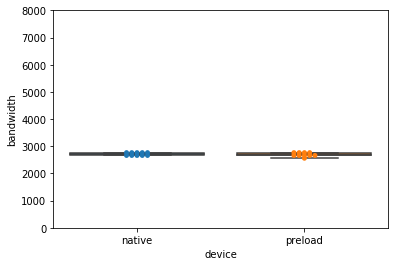

In [3]:
## WRITE BW
ax = sns.boxplot(x="device", y="bandwidth", data=df[df['mode'] == 'write'])
ax = sns.swarmplot(x="device", y="bandwidth", data=df[df['mode'] == 'write'])
ax.set_ylim(0, 8000)

(0, 8000)

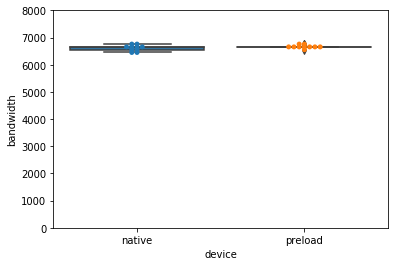

In [4]:
## CACHED READ BW
ax = sns.boxplot(x="device", y="bandwidth", data=df[df['mode'] == 'cached'])
ax = sns.swarmplot(x="device", y="bandwidth", data=df[df['mode'] == 'cached'])
ax.set_ylim(0, 8000)

(0, 8000)

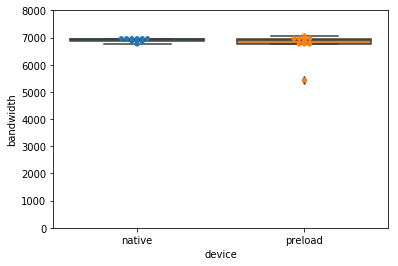

In [5]:
## READ BW
ax = sns.boxplot(x="device", y="bandwidth", data=df[df['mode'] == 'read'])
ax = sns.swarmplot(x="device", y="bandwidth", data=df[df['mode'] == 'read'])
ax.set_ylim(0, 8000)